<h1>Installed Packages</h1>

In [3]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install scipy
!pip install scikit-learn
!pip install pingouin

<h3> Importing the packages </h3>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
import scipy.stats as stats
from scipy.stats import zscore
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import pingouin as pg
import plotly.express as px 
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default='browser'

<h3> Importing the database </h3>

In [20]:
dados_paises = pd.read_csv(r'C:\Users\Khomp\Desktop\P&D\USP\MÓDULOS\02-MÓDULO 1\01-Unsupervised Machine Learning Clustering I\Aula - Análise de Cluster\Aula - Análise de Cluster\dados_paises.csv')
## Fonte: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

<h3> Viewing information about data and variables </h3>

In [21]:
# Descriptive statistics of variables

tab_desc = dados_paises.describe()
tab_desc

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [22]:
# Correlation matrix of variables

# Let's remove the "country" column, as it is just an id
paises = dados_paises.drop(columns=['country'])

# Generating the Pearson correlation matrix
matriz_corr = pg.rcorr(paises, method = 'pearson', upper = 'pval', decimals = 4, pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})
matriz_corr

C:\Users\Khomp\USPesalqMBA\Lib\site-packages\pingouin\correlation.py:1116: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,-,***,***,,***,***,***,***,***
exports,-0.3181,-,,***,***,,***,***,***
health,-0.2004,-0.1144,-,,*,***,***,**,***
imports,-0.1272,0.7374,0.0957,-,,***,,**,
income,-0.5243,0.5168,0.1296,0.1224,-,*,***,***,***
inflation,0.2883,-0.1073,-0.2554,-0.247,-0.1478,-,***,***,***
life_expec,-0.8867,0.3163,0.2107,0.0544,0.612,-0.2397,-,***,***
total_fer,0.8485,-0.32,-0.1967,-0.159,-0.5018,0.3169,-0.7609,-,***
gdpp,-0.483,0.4187,0.346,0.1155,0.8956,-0.2216,0.6001,-0.4549,-


<h3>Heat map indicating correlation between attributes</h3>

In [23]:
# Basic correlation matrix
corr = paises.corr()

# Heat graph (heatmap)
fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = corr.columns,
        y = corr.index,
        z = np.array(corr),
        text=corr.values,
        texttemplate='%{text:.2f}',
        colorscale='viridis'))

fig.update_layout(
    height = 600,
    width = 600)

fig.show()


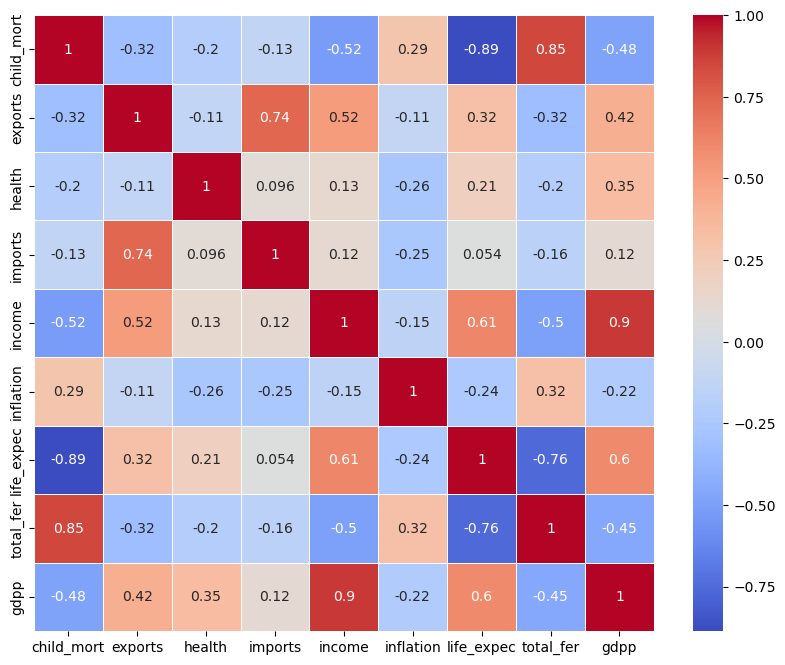

In [25]:
# Create the heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(paises.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


<h3>Standardization of variables</h3>

In [28]:
# Applying the ZScore procedure to all variables
paises_pad = paises.apply(zscore, ddof=1)

# The variables now have mean = 0 and standard deviation = 1

<h3>Agglomerative hierarchical clustering: Euclidean distance + single linkage</h3>

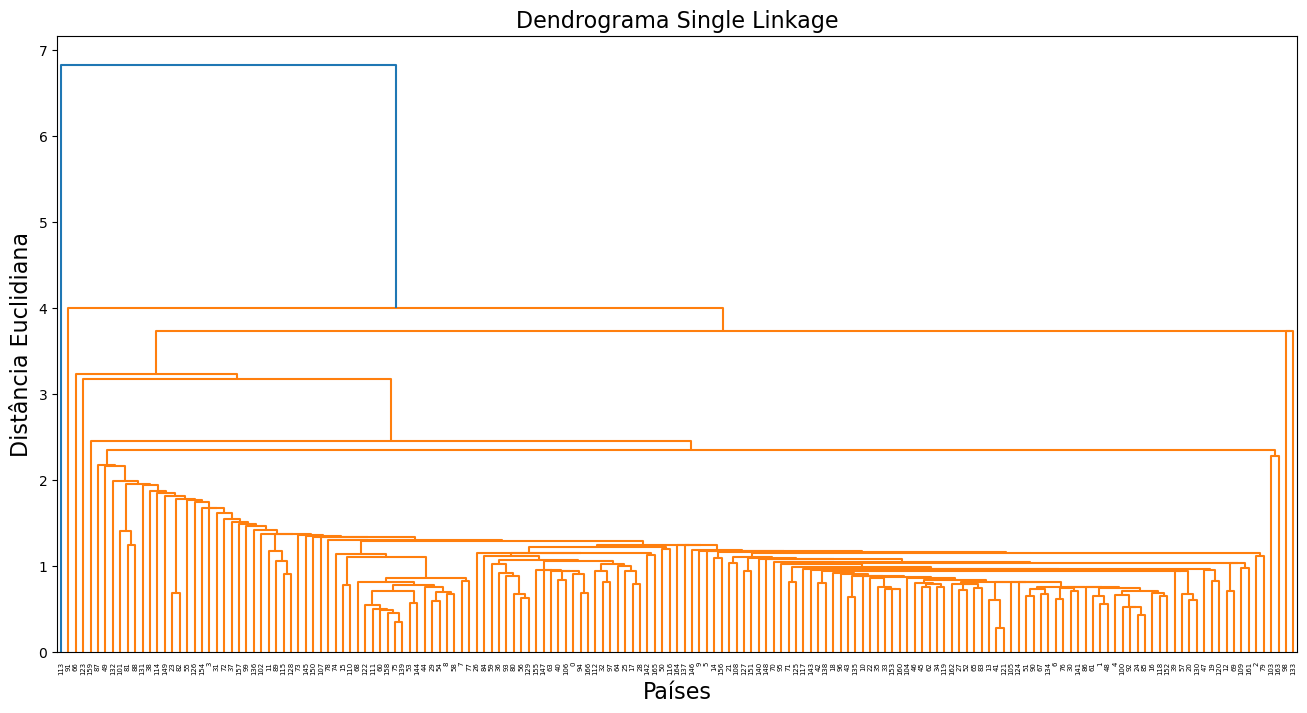

In [29]:
# Visualizing distances
dist_euclidiana = pdist(paises_pad, metric='euclidean')

# Options for distances ("metric"):
    ## euclidean
    ## sqeuclidean
    ## cityblock
    ## chebyshev
    ## canberra
    ## correlation

# Generating the dendrogram
## Euclidean distance and single linkage method

plt.figure(figsize=(16,8))
dend_sing = sch.linkage(paises_pad, method = 'single', metric = 'euclidean')
dendrogram_s = sch.dendrogram(dend_sing)
plt.title('Dendrograma Single Linkage', fontsize=16)
plt.xlabel('Países', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.show()

# Options for the chaining method ("method"):
    ## single
    ## complete
    ## average

# Options for distances ("metric"):
    ## euclidean
    ## sqeuclidean
    ## cityblock
    ## chebyshev
    ## canberra
    ## correlation

<h3>Agglomerative hierarchical clustering: Euclidean distance + average linkage</h3>

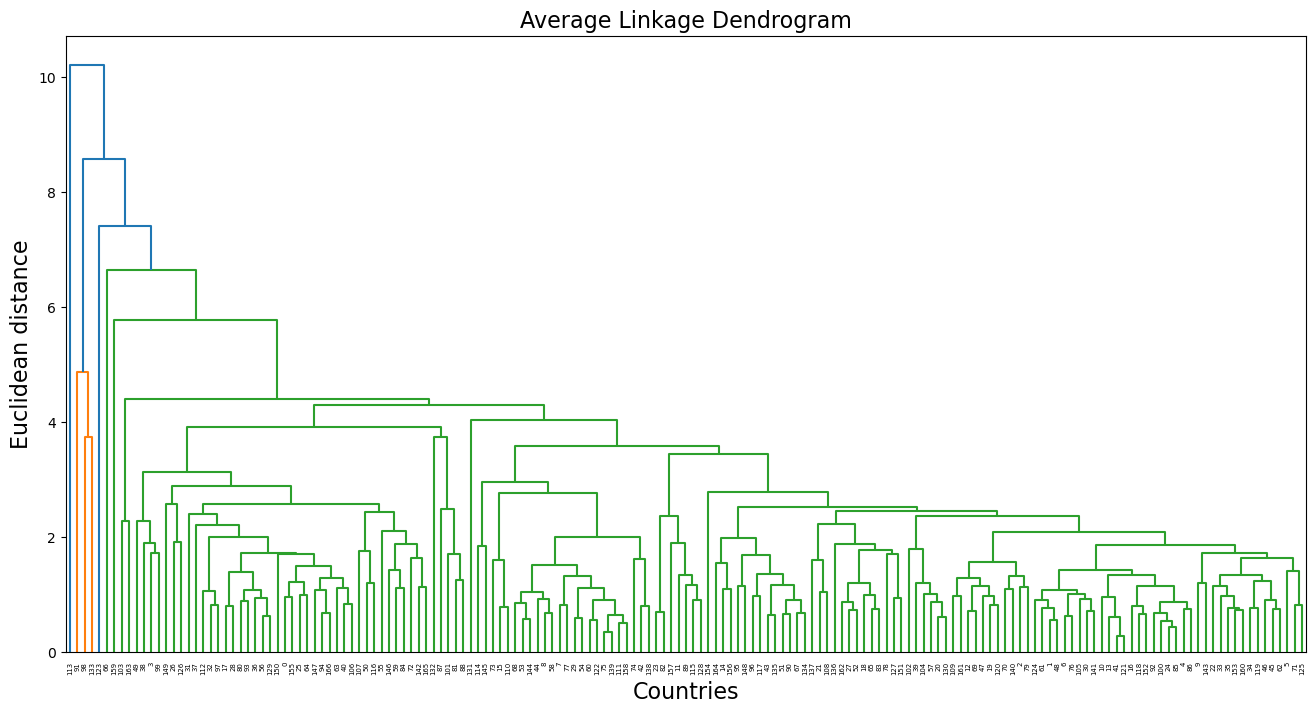

In [30]:
# Generating the dendrogram
## Euclidean distance and average linkage method

plt.figure(figsize=(16,8))
dend_avg = sch.linkage(paises_pad, method = 'average', metric = 'euclidean')
dendrogram_a = sch.dendrogram(dend_avg)
plt.title('Average Linkage Dendrogram', fontsize=16)
plt.xlabel('Countries', fontsize=16)
plt.ylabel('Euclidean distance', fontsize=16)
plt.show()

<h3>Agglomerative hierarchical clustering: Euclidean distance + complete linkage</h3>

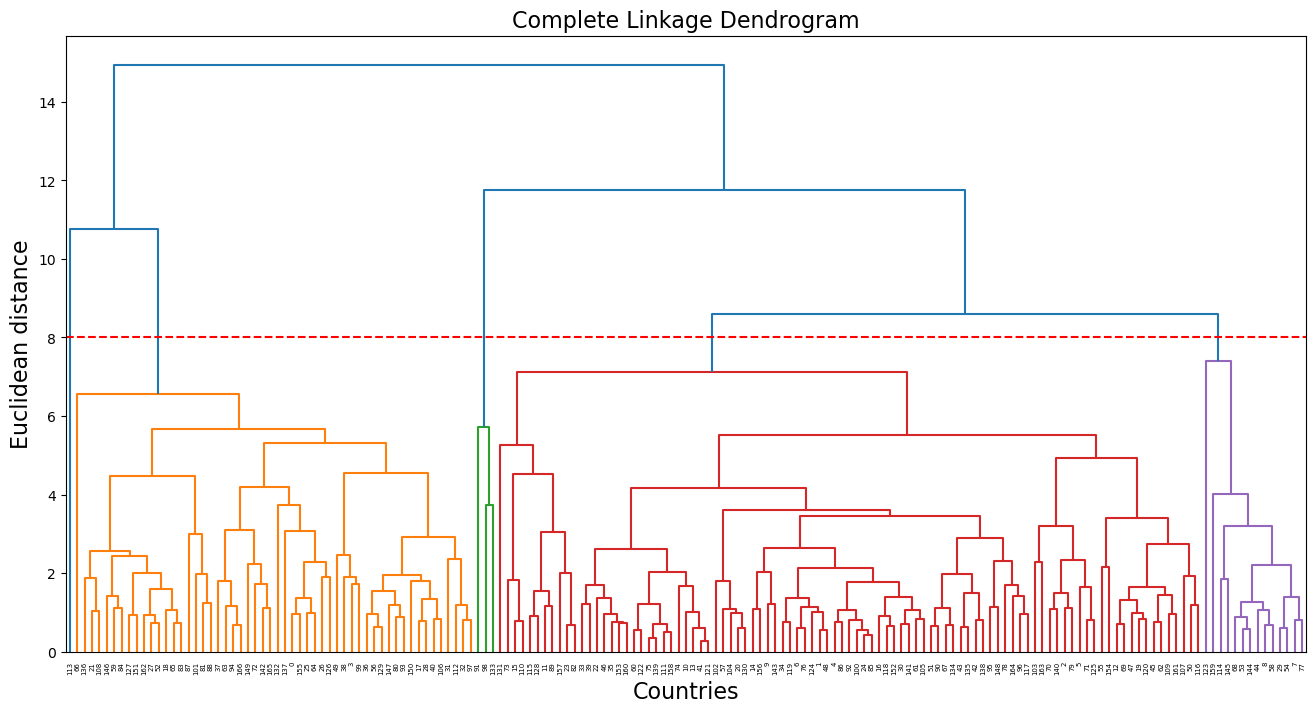

In [31]:
# Generating the dendrogram
## Euclidean distance and complete linkage method

plt.figure(figsize=(16,8))
dend_compl = sch.linkage(paises_pad, method = 'complete', metric = 'euclidean')
dendrogram_c = sch.dendrogram(dend_compl, color_threshold = 8)
plt.title('Complete Linkage Dendrogram', fontsize=16)
plt.xlabel('Countries', fontsize=16)
plt.ylabel('Euclidean distance', fontsize=16)
plt.axhline(y = 8, color = 'red', linestyle = '--')
plt.show()

# Generating the variable with the cluster indication in the dataset

cluster_comp = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'complete')
indica_cluster_comp = cluster_comp.fit_predict(paises_pad)
dados_paises['cluster_complete'] = indica_cluster_comp
paises_pad['cluster_complete'] = indica_cluster_comp
dados_paises['cluster_complete'] = dados_paises['cluster_complete'].astype('category')
paises_pad['cluster_complete'] = paises_pad['cluster_complete'].astype('category')

<h3>One-way analysis of variance (ANOVA)</h3>

In [33]:
# Output interpretation:

## cluster_kmeans MS: indicates the variability between groups
## Within MS: indicates the variability within groups
## F: test statistic (cluster_kmeans MS / Within MS)
## p-unc: p-value of the F statistic
## if p-value < 0.05: at least one cluster has a statistically different mean from the others

# child_mort
pg.anova(dv='child_mort', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

,0,1
Source,cluster_complete,Within
SS,100.71482,65.28518
DF,4,162
MS,25.178705,0.402995
F,62.478961,NaN
p-unc,0.0,NaN
np2,0.606716,NaN


In [34]:
# exports
pg.anova(dv='exports', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T


,0,1
Source,cluster_complete,Within
SS,79.966834,86.033166
DF,4,162
MS,19.991709,0.531069
F,37.644283,NaN
p-unc,0.0,NaN
np2,0.481728,NaN


In [35]:
# imports
pg.anova(dv='imports', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

,0,1
Source,cluster_complete,Within
SS,69.028651,96.971349
DF,4,162
MS,17.257163,0.598589
F,28.829756,NaN
p-unc,0.0,NaN
np2,0.415835,NaN


In [36]:
# health
pg.anova(dv='health', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

,0,1
Source,cluster_complete,Within
SS,25.065957,140.934043
DF,4,162
MS,6.266489,0.869963
F,7.203166,NaN
p-unc,0.000023,NaN
np2,0.151,NaN


In [37]:
# income
pg.anova(dv='income', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

,0,1
Source,cluster_complete,Within
SS,84.56379,81.43621
DF,4,162
MS,21.140947,0.502693
F,42.055414,NaN
p-unc,0.0,NaN
np2,0.50942,NaN


In [38]:
# inflation
pg.anova(dv='inflation', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

,0,1
Source,cluster_complete,Within
SS,88.665145,77.334855
DF,4,162
MS,22.166286,0.477376
F,46.433635,NaN
p-unc,0.0,NaN
np2,0.534127,NaN


In [39]:
# life_expec
pg.anova(dv='life_expec', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

,0,1
Source,cluster_complete,Within
SS,111.450643,54.549357
DF,4,162
MS,27.862661,0.336724
F,82.746182,NaN
p-unc,0.0,NaN
np2,0.671389,NaN


In [40]:
# total_fer
pg.anova(dv='total_fer', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

,0,1
Source,cluster_complete,Within
SS,113.930595,52.069405
DF,4,162
MS,28.482649,0.321416
F,88.616129,NaN
p-unc,0.0,NaN
np2,0.686329,NaN


In [41]:
# gdpp
pg.anova(dv='gdpp', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

## The most discriminant variable contains the largest (and significant) F-statistic
## The value of the F-statistic is sensitive to sample size

,0,1
Source,cluster_complete,Within
SS,107.339064,58.660936
DF,4,162
MS,26.834766,0.362105
F,74.107785,NaN
p-unc,0.0,NaN
np2,0.646621,NaN


<h3>3D graph of clusters</h3>

In [43]:
# Perspective 1
fig = px.scatter_3d(dados_paises, 
                    x='total_fer', 
                    y='income', 
                    z='life_expec',
                    color='cluster_complete')
fig.show()

C:\Users\Khomp\USPesalqMBA\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [46]:
# Perspective 2
fig = px.scatter_3d(dados_paises, 
                    x='gdpp', 
                    y='income', 
                    z='life_expec',
                    color='cluster_complete')
fig.show()

C:\Users\Khomp\USPesalqMBA\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<h3>Identification of cluster characteristics</h3>

In [50]:
# Clustering the database

analise_paises = dados_paises.drop(columns=['country']).groupby(by=['cluster_complete'])

# Descriptive statistics by group

tab_medias_grupo = analise_paises.mean().T
tab_medias_grupo


C:\Users\Khomp\AppData\Local\Temp\ipykernel_9268\1355760813.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



cluster_complete,0,1,2,3,4
child_mort,4.500000,18.874737,4.133333,130.00,81.344444
exports,39.392857,42.718726,176.000000,25.30,31.520741
health,10.292143,6.410842,6.793333,5.07,6.660185
imports,33.207143,44.488062,156.666667,17.40,49.111111
income,49721.428571,18582.000000,64033.333333,5150.00,3787.462963
inflation,2.093571,7.124495,2.468000,104.00,8.926389
life_expec,80.892857,74.478947,81.433333,60.50,60.555556
total_fer,1.800000,2.142000,1.380000,5.84,4.697037
gdpp,53742.857143,11941.473684,57566.666667,2330.00,1910.074074


In [51]:
tab_desc_grupo = analise_paises.describe().T
tab_desc_grupo

cluster_complete             0             1              2       3  \
child_mort count     14.000000     95.000000       3.000000     1.0   
           mean       4.500000     18.874737       4.133333   130.0   
           std        1.781529     16.376170       2.309401     NaN   
           min        2.600000      3.200000       2.800000   130.0   
           25%        3.200000      7.700000       2.800000   130.0   
...                        ...           ...            ...     ...   
gdpp       min    40600.000000    482.000000   21100.000000  2330.0   
           25%    44925.000000   3885.000000   33850.000000  2330.0   
           50%    47900.000000   8000.000000   46600.000000  2330.0   
           75%    56525.000000  14050.000000   75800.000000  2330.0   
           max    87800.000000  50300.000000  105000.000000  2330.0   

cluster_complete             4  
child_mort count     54.000000  
           mean      81.344444  
           std       39.074325  
           min       17.400000  
           25%       54.275000  
...                        ...  
gdpp       min      231.000000  
           25%      566.000000  
           50%      983.500000  
           75%     2600.000000  
           max    17100.000000  

[72 rows x 5 columns]